In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [86]:
counties = pd.read_csv("counties.csv")

In [87]:
print("counties : ", counties.shape)
counties.head()

counties :  (3220, 37)


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [88]:
clean_counties_df = counties

In [89]:
clean_counties_df.index=clean_counties_df['State'] + "-" + clean_counties_df['County']
clean_counties_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
Alabama-Baldwin,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
Alabama-Barbour,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
Alabama-Bibb,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
Alabama-Blount,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [90]:
drop=["CensusId" , "State" , "County"]
clean_counties_df = clean_counties_df.drop(columns=drop)
clean_counties_df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
Alabama-Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
Alabama-Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
Alabama-Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
Alabama-Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [91]:
for key,val in clean_counties_df.isna().sum().items() :
    if val > 0 :
        print("data : ", key, " value : ", val)

data :  Income  value :  1
data :  IncomeErr  value :  1
data :  ChildPoverty  value :  1


In [92]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [93]:
clean_counties_df = imp.fit_transform(clean_counties_df)

In [94]:
clean_counties_df = pd.DataFrame(clean_counties_df)

In [95]:
clean_counties_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64

In [107]:

scaler=MinMaxScaler()
# store them in this dataframe
counties_scaled=pd.DataFrame(scaler.fit_transform(clean_counties_df.astype(float)))

# get same features and State-County indices
counties_scaled.columns=clean_counties_df.columns
counties_scaled.index=clean_counties_df.index

counties_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.005493,0.005400,0.005583,0.026026,0.759519,0.215367,0.004343,0.024038,0.0,0.006722,...,0.007022,0.033248,0.048387,0.552430,0.005161,0.767773,0.250000,0.150273,0.000000,0.208219
1,0.019429,0.019265,0.019588,0.045045,0.832665,0.110594,0.006515,0.016827,0.0,0.024413,...,0.014045,0.035806,0.104839,0.549872,0.018529,0.892575,0.107616,0.158470,0.040816,0.205479
2,0.002674,0.002923,0.002433,0.046046,0.462926,0.543655,0.002172,0.009615,0.0,0.003412,...,0.025281,0.038363,0.043011,0.491049,0.001841,0.739336,0.248344,0.199454,0.010204,0.482192
3,0.002243,0.002433,0.002059,0.022022,0.746493,0.249127,0.004343,0.002404,0.0,0.002880,...,0.008427,0.038363,0.018817,0.611253,0.001776,0.818325,0.170530,0.183060,0.040816,0.227397
4,0.005741,0.005757,0.005725,0.086086,0.880762,0.017462,0.003257,0.002404,0.0,0.006990,...,0.012640,0.010230,0.061828,0.767263,0.004773,0.900474,0.127483,0.114754,0.040816,0.210959


In [112]:
train_data_np = counties_scaled.values.astype('float32')
train_data_np

array([[0.00549256, 0.00539966, 0.00558277, ..., 0.15027322, 0.        ,
        0.20821919],
       [0.01942918, 0.01926513, 0.01958848, ..., 0.15846995, 0.04081633,
        0.20547946],
       [0.00267446, 0.00292297, 0.00243315, ..., 0.19945355, 0.01020408,
        0.48219177],
       ...,
       [0.00245061, 0.00243544, 0.00246535, ..., 0.3579235 , 0.02040816,
        0.70958906],
       [0.00360559, 0.00356014, 0.00364972, ..., 0.19945355, 0.        ,
        0.6657534 ],
       [0.00392387, 0.00384304, 0.00400236, ..., 0.12021858, 0.        ,
        0.74246573]], dtype=float32)

In [113]:
pca = PCA(n_components=5)

In [114]:
new_X = pca.fit_transform(train_data_np)

In [115]:
counties_transformed = pd.DataFrame(new_X)
PCA_list=['c_1', 'c_2', 'c_3', 'c_4', 'c_5']
counties_transformed.columns=PCA_list


counties_transformed.head()

,c_1,c_2,c_3,c_4,c_5
0,-0.060001,-0.161291,0.103227,0.111557,-0.008554
1,-0.147267,-0.175116,0.155228,-0.031061,-0.066264
2,0.506419,-0.309737,-0.121293,0.295383,0.091324
3,0.070034,-0.202348,-0.213751,0.014744,0.283519
4,-0.088396,-0.250815,-0.012843,-0.200192,0.107677


In [101]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(counties_transformed)
    wcss.append(kmeans.inertia_)
wcss

[700607750000000.0,
 341172185226995.1,
 175240224743873.12,
 95682972535997.39,
 58292811591437.78,
 36044965341092.83,
 26049714109485.887,
 18914663377361.562,
 15297915768719.781,
 12536534820683.88]

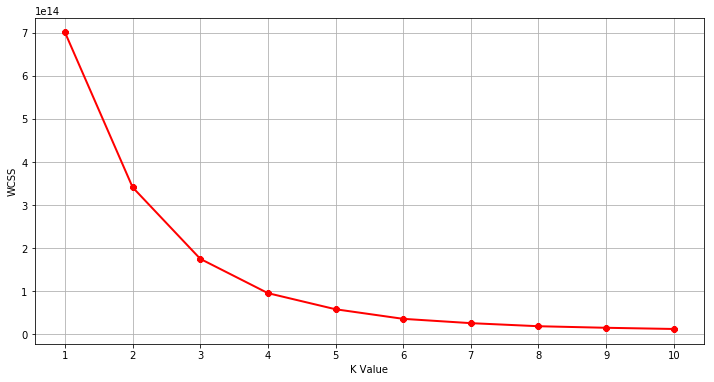

In [102]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [103]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(counties_transformed)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [104]:
counties_transformed["label"] = clusters
counties_transformed.head()

,c_1,c_2,c_3,c_4,c_5,label
0,-65132.074219,-1994.345215,-4405.834961,2981.468018,464.585358,0
1,145517.593750,-14245.843750,6379.371094,5478.722656,-47.149555,0
2,-108102.234375,9264.574219,10861.270508,-2704.820068,-2156.666504,0
3,-114016.132812,6641.365723,5316.706543,-1882.001221,-1668.237061,0
4,-62497.164062,1573.729492,2003.438721,3044.754639,-967.622009,0


In [105]:
df = counties_transformed

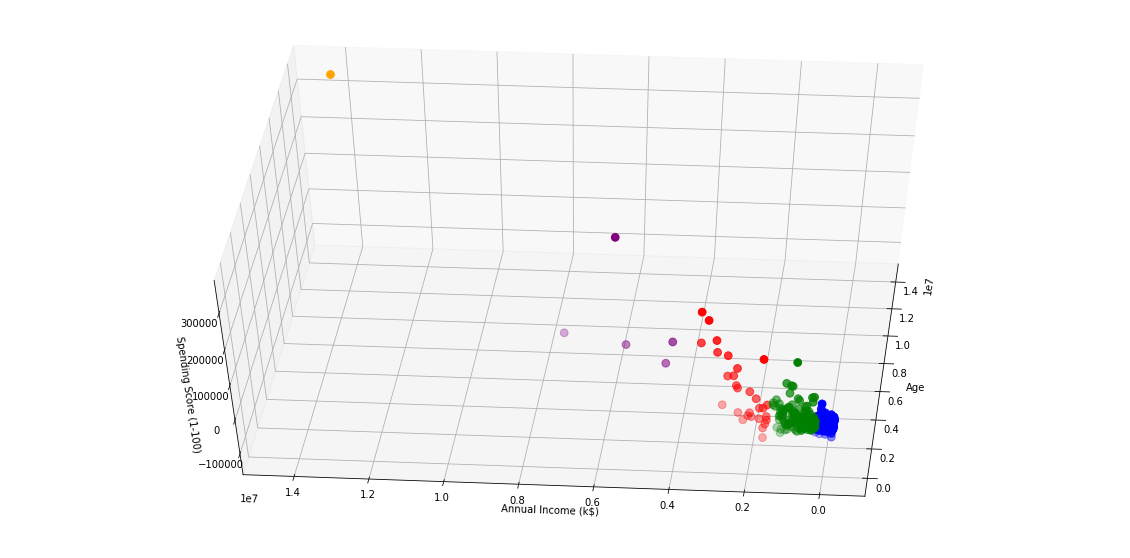

In [106]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.c_1[df.label == 0], df["c_1"][df.label == 0], df["c_2"][df.label == 0], c='blue', s=60)
ax.scatter(df.c_1[df.label == 1], df["c_1"][df.label == 1], df["c_2"][df.label == 1], c='red', s=60)
ax.scatter(df.c_1[df.label == 2], df["c_1"][df.label == 2], df["c_2"][df.label == 2], c='green', s=60)
ax.scatter(df.c_1[df.label == 3], df["c_1"][df.label == 3], df["c_2"][df.label == 3], c='orange', s=60)
ax.scatter(df.c_1[df.label == 4], df["c_1"][df.label == 4], df["c_2"][df.label == 4], c='purple', s=60)
ax.view_init(50, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()